In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential

In [6]:
train = pd.read_csv("D:\DL-LAB\LP-IV-datasets\MNIST(Ass2&3)\mnist_train.csv")

In [8]:
test = pd.read_csv("D:\DL-LAB\LP-IV-datasets\MNIST(Ass2&3)\mnist_test.csv")

In [9]:
x_train = train.drop(['label'] , axis = 1).values

In [11]:
x_train.shape

(60000, 784)

In [13]:
x_train = x_train.reshape(60000,28,28,1).astype('float32')/255

In [15]:
y_train = train['label'].values

In [16]:
y_train.shape

(60000,)

In [20]:
x_test = test.drop(['label'] , axis = 1).values

In [21]:
x_test = x_test.reshape(10000,28,28,1).astype('float32')/255

In [22]:
y_test = test['label'].values

In [24]:
y_test.shape

(10000,)

In [25]:
model = Sequential([
    Flatten(input_shape = (28,28,1)),
    Dense(128,activation = 'relu'),
    Dense(64,activation = 'relu'),
    Dense(28,activation = 'relu'),
    Dropout(0.2),
    Dense(10,activation = 'softmax')
])

C:\Users\rutur\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
model.compile(optimizer = SGD(learning_rate = 0.01), loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [27]:
history = model.fit(x_train,y_train,batch_size = 64,epochs = 11, validation_split = 0.2)

Epoch 1/11
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.3991 - loss: 1.7728 - val_accuracy: 0.8604 - val_loss: 0.5416
Epoch 2/11
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8036 - loss: 0.6374 - val_accuracy: 0.9038 - val_loss: 0.3572
Epoch 3/11
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8592 - loss: 0.4784 - val_accuracy: 0.9153 - val_loss: 0.3010
Epoch 4/11
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8842 - loss: 0.4018 - val_accuracy: 0.9234 - val_loss: 0.2650
Epoch 5/11
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8994 - loss: 0.3506 - val_accuracy: 0.9308 - val_loss: 0.2408
Epoch 6/11
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9045 - loss: 0.3294 - val_accuracy: 0.9370 - val_loss: 0.2189
Epoch 7/11
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9154 - loss: 0.2950 - val_accuracy: 0.9420 - val_loss: 0.2054
Epoch 8/11
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9238 - loss: 0.2703 - val_accuracy: 0.

In [34]:
loss,accuracy = model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9450 - loss: 0.1835


In [35]:
loss

0.1586007922887802

In [36]:
accuracy

0.9520999789237976

In [37]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [41]:
y_pred = np.argmax(y_pred,1)

In [43]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [44]:
csr = classification_report(y_test,y_pred)

In [46]:
print(csr)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.96      0.94      0.95      1032
           3       0.93      0.95      0.94      1010
           4       0.95      0.95      0.95       982
           5       0.93      0.93      0.93       892
           6       0.96      0.96      0.96       958
           7       0.96      0.95      0.95      1028
           8       0.94      0.93      0.94       974
           9       0.93      0.94      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



In [47]:
history.history

{'accuracy': [0.578041672706604,
  0.8245833516120911,
  0.8663750290870667,
  0.8864791393280029,
  0.9002291560173035,
  0.909166693687439,
  0.9168541431427002,
  0.9246041774749756,
  0.9282916784286499,
  0.9325833320617676,
  0.937416672706604],
 'loss': [1.309293508529663,
  0.5786324739456177,
  0.45392656326293945,
  0.3907705843448639,
  0.346211314201355,
  0.31812241673469543,
  0.2893482744693756,
  0.2643822133541107,
  0.24884173274040222,
  0.23219823837280273,
  0.21829017996788025],
 'val_accuracy': [0.8604166507720947,
  0.9037500023841858,
  0.9152500033378601,
  0.9234166741371155,
  0.9307500123977661,
  0.9369999766349792,
  0.9419999718666077,
  0.9437500238418579,
  0.9482499957084656,
  0.9504166841506958,
  0.9510833621025085],
 'val_loss': [0.5416407585144043,
  0.35715681314468384,
  0.30100834369659424,
  0.2650465965270996,
  0.24076586961746216,
  0.21887819468975067,
  0.2053779661655426,
  0.1939934641122818,
  0.17814959585666656,
  0.1687115430831909

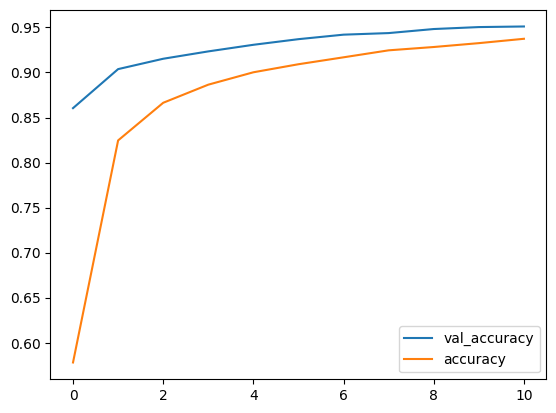

In [52]:
plt.plot(history.history['val_accuracy'] , label = 'val_accuracy')
plt.plot(history.history['accuracy'] , label = 'accuracy')
plt.legend()

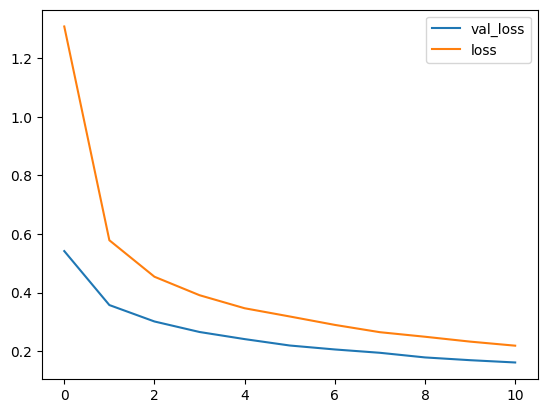

In [53]:
plt.plot(history.history['val_loss'] , label = 'val_loss')
plt.plot(history.history['loss'] , label = 'loss')
plt.legend()